In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### DATA COLLECTION

In [170]:
df = pd.read_csv("C:\\Users\\thall\\Github Work\\Car-Price-Prediction\\car_price_dataset.csv")
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [171]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [173]:
df.shape

(10000, 10)

In [174]:
## check null values
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [175]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [176]:
## check duplicates and drop

df.duplicated()
df = df.drop_duplicates()


In [177]:
# Check dimensions again
df.shape

(10000, 10)

### Exploratory Data Analysis

In [178]:
#checking summary statistics
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [179]:
df[df['Doors']>=5].value_counts()

Brand       Model   Year  Engine_Size  Fuel_Type  Transmission    Mileage  Doors  Owner_Count  Price
Audi        A3      2001  1.8          Petrol     Automatic       43196    5      2            6836     1
Kia         Rio     2019  4.2          Hybrid     Manual          116016   5      5            12679    1
                    2017  4.0          Electric   Automatic       163393   5      4            13432    1
                    2018  1.0          Hybrid     Semi-Automatic  80532    5      1            9889     1
                          1.2          Petrol     Semi-Automatic  4980     5      5            10600    1
                                                                                                       ..
Ford        Fiesta  2005  1.1          Petrol     Automatic       210763   5      5            3984     1
                          1.5          Diesel     Automatic       54274    5      4            7514     1
                                       Electric   A

In [180]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [181]:
## Models and COunt for each brand
brand_models = df.groupby('Brand')['Model'].value_counts()
print(brand_models)
print()
print()
unique_brand_model = df.groupby('Brand')['Model'].nunique()
unique_brand_model

Brand       Model   
Audi        Q5          350
            A4          350
            A3          338
BMW         5 Series    353
            3 Series    335
            X5          311
Chevrolet   Impala      355
            Malibu      333
            Equinox     315
Ford        Fiesta      363
            Focus       351
            Explorer    334
Honda       Accord      365
            Civic       336
            CR-V        308
Hyundai     Elantra     347
            Tucson      329
            Sonata      319
Kia         Optima      336
            Rio         327
            Sportage    313
Mercedes    E-Class     321
            GLA         315
            C-Class     306
Toyota      Corolla     325
            RAV4        324
            Camry       321
Volkswagen  Tiguan      352
            Golf        339
            Passat      329
Name: count, dtype: int64




Brand
Audi          3
BMW           3
Chevrolet     3
Ford          3
Honda         3
Hyundai       3
Kia           3
Mercedes      3
Toyota        3
Volkswagen    3
Name: Model, dtype: int64

In [182]:
brand_models = df.groupby('Brand')['Model'].nunique().reset_index()
brand_models.columns = ['Brand', 'Number_of_Models']

print(brand_models)

        Brand  Number_of_Models
0        Audi                 3
1         BMW                 3
2   Chevrolet                 3
3        Ford                 3
4       Honda                 3
5     Hyundai                 3
6         Kia                 3
7    Mercedes                 3
8      Toyota                 3
9  Volkswagen                 3


In [183]:
df_num = df.describe().columns

#### Data Visualization

In [184]:
df_corr = df[df_num].corr()
df_corr

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


<Axes: >

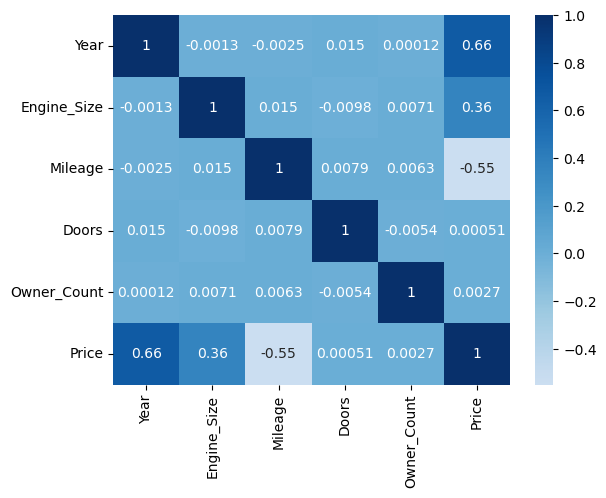

In [185]:
sns.heatmap(df_corr, annot = True,center = 0,  cmap = 'Blues')



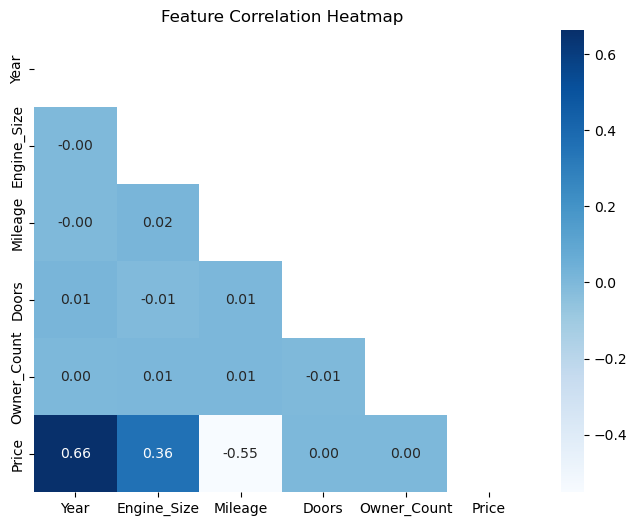

In [191]:
plt.figure(figsize=(8, 6))
df_num = df.select_dtypes(include=[np.number])  # Selecting only numerical columns
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))  # Mask for upper triangle
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='Blues', mask=mask)
plt.title("Feature Correlation Heatmap")
plt.show()


In [187]:
print(df.loc[df['Year']== 2023, 'Mileage'].value_counts())

Mileage
160971    1
238306    1
141520    1
31933     1
267964    1
         ..
167226    1
140554    1
153793    1
26070     1
290306    1
Name: count, Length: 448, dtype: int64


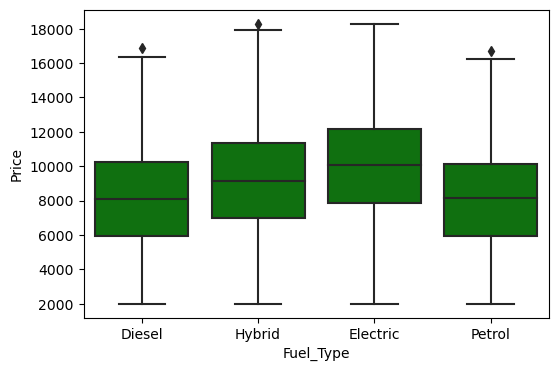

In [157]:
plt.figure(figsize = (6, 4))
sns.boxplot(x='Fuel_Type', y='Price', data=df, color = 'g')
plt.show()


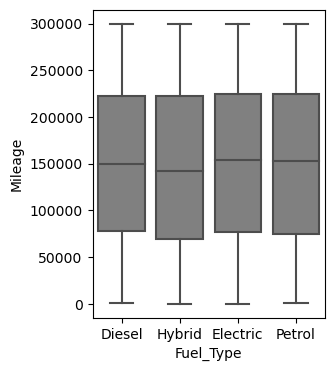

In [165]:
plt.figure(figsize = (3, 4))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df, color = 'grey')
plt.show()


In [105]:
mileage_vs_price = df.groupby('Year')['Mileage'].mean().reset_index()
mileage_vs_price

,Year,Mileage
0,2000,150041.442748
1,2001,143993.108374
2,2002,150562.837662
3,2003,152790.910761
4,2004,154721.365482
5,2005,149206.301624
6,2006,148022.272289
7,2007,148132.748837
8,2008,153318.565445
9,2009,146682.208020


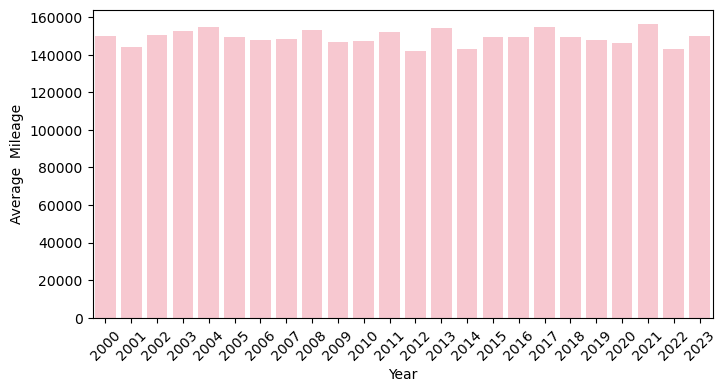

In [113]:
plt.figure(figsize = (8, 4))
sns.barplot(data = mileage_vs_price, x = 'Year', y = 'Mileage', color = 'pink')
plt.xlabel("Year")
plt.ylabel("Average  Mileage")
plt.xticks(rotation = 45)
plt.show()

In [131]:
Year_vs_price = df.groupby('Year')['Price'].mean().reset_index()


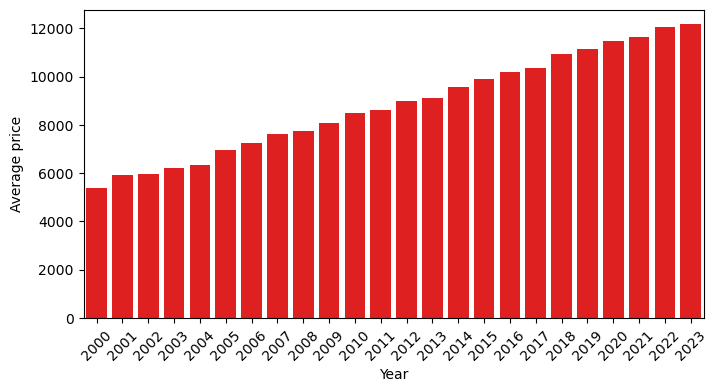

In [132]:
plt.figure(figsize = (8, 4))
sns.barplot(data = Year_vs_price, x = 'Year', y = 'Price', color = 'red')
plt.xlabel("Year")
plt.ylabel("Average price")
plt.xticks(rotation = 45)
plt.show()

In [145]:
# Average price by brand from the dataset
brand_Model_price = df.groupby(['Brand', 'Model'])['Price'].mean().reset_index()
brand_Model_price

,Brand,Model,Price
0,Audi,A3,8912.316568
1,Audi,A4,8919.962857
2,Audi,Q5,8955.257143
3,BMW,3 Series,8854.752239
4,BMW,5 Series,8669.218130
5,BMW,X5,8581.311897
6,Chevrolet,Equinox,9156.320635
7,Chevrolet,Impala,9001.115493
8,Chevrolet,Malibu,8898.180180
9,Ford,Explorer,8804.895210


In [134]:
# Average price by brand from the dataset
brand_avg_price = df.groupby('Brand')['Price'].mean().reset_index()
brand_avg_price

,Brand,Price
0,Audi,8929.373796
1,BMW,8704.068068
2,Chevrolet,9015.683948
3,Ford,8852.570611
4,Honda,8665.596630
5,Hyundai,8778.279397
6,Kia,8880.086066
7,Mercedes,8980.087049
8,Toyota,8798.184536
9,Volkswagen,8928.377451


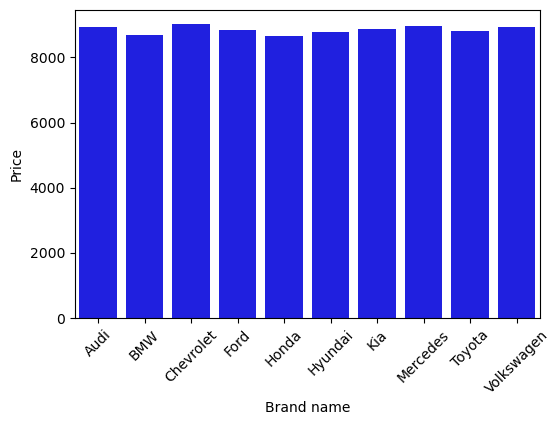

In [96]:
plt.figure(figsize = (6, 4))
sns.barplot(data = brand_avg_price, x = 'Brand', y = 'Price', color = 'b')
plt.xlabel("Brand name")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

### FEATURE ENGINEERING

In [30]:
#### adding current year to calculate number of years from the time car was bought

df['Current_Year'] = datetime.now().year

df['How_old_car'] = df['Current_Year'] - df['Year']
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Current_Year,How_old_car
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,2025,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,2025,13
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,2025,5
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2025,2
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,2025,22


In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df)

In [31]:
df_numerical = list(df.describe().columns)
df_categorical = list(set(df.columns).difference(df_numerical))
print(df_numerical)
print(df_categorical)

['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price', 'Current_Year', 'How_old_car']
['Fuel_Type', 'Model', 'Brand', 'Transmission']


In [33]:


df_num = df[df_numerical]

df_cat = df[df_categorical]

In [36]:
df_num.dtypes

Year              int64
Engine_Size     float64
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
Current_Year      int64
How_old_car       int64
dtype: object

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_num.corr(), annot = True, fmt = ".2f", cmap = 'Blues')
plt.show()

In [43]:
df_cat = pd.get_dummies(df_cat, dtype = int)
df_cat

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Model_3 Series,Model_5 Series,Model_A3,Model_A4,Model_Accord,Model_C-Class,...,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9997,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9998,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [50]:
concat_df = pd.concat([df_num, df_cat], axis=1)
concat_df.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Current_Year,How_old_car,Fuel_Type_Diesel,Fuel_Type_Electric,...,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,2025,5,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,2025,13,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,4.2,231440,4,2,11171,2025,5,1,0,...,0,0,0,0,1,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,2025,2,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,2025,22,0,0,...,0,0,0,0,0,0,1,0,0,1
